In [1]:
%matplotlib inline
import seaborn as sns; #sns.set(style="ticks", color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import gridspec
import scipy
style.use('fast')
from datetime import datetime
from io import StringIO
import re
import numpy as np
from datetime import datetime
import os


In [112]:
sns.set_style('ticks',{'legend.frameon':True} )
sns.set_palette('colorblind')
FIG_SIZE = (12, 3)
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['text.usetex'] = True

plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['axes.labelsize']= 22
flatui = [sns.xkcd_rgb["medium green"], "orange", sns.xkcd_rgb["medium purple"], "#e74c3c", "#34495e", "#2ecc71"]


In [3]:
# Cliff's Delta
from __future__ import division
 
def cliffsDelta(lst1,lst2,
                dull = [0.147, # small
                        0.33,  # medium
                        0.474 # large
                        ][0] ): 
  "Returns true if there are more than 'dull' differences"
  m, n = len(lst1), len(lst2)
  lst2 = sorted(lst2)
  j = more = less = 0
  for repeats,x in runs(sorted(lst1)):
    while j <= (n - 1) and lst2[j] <  x: 
      j += 1
    more += j*repeats
    while j <= (n - 1) and lst2[j] == x: 
      j += 1
    less += (n - j)*repeats
  d= (more - less) / (m*n)
  f=abs(d)  > dull
  print("d="+str(d))#+' '+str(f))
  return abs(d)  > dull
   
def runs(lst):
  "Iterator, chunks repeated values"
  for j,two in enumerate(lst):
    if j == 0:
      one,i = two,0
    if one!=two:
      yield j - i,one
      i = j
    one=two
  yield j - i + 1,two
  
def _cliffsDelta():
  "demo function"
  lst1=[1,2,3,4,5,6,7]
  for r in [1.01,1.1,1.21, 1.5, 2]:
    lst2=map(lambda x: x*r,lst1)
    #return lst2
    #print(lst2,cliffsDelta(lst1,lst2)) # should return False

# LOAD TRACKED PACKAGES AND THEIR SOURCES

In [5]:
# Load used packages ( prepared)
official_sources=pd.read_csv('../../docker/csv/used/official_sources.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)
community_sources=pd.read_csv('../../docker/csv/used/community_sources.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)
official_sources['type']="Official"
community_sources['type']="Community"

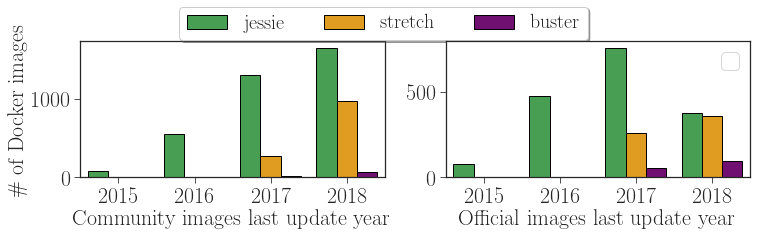

In [108]:
figure, axes = plt.subplots(1, 2, sharex=True, sharey=False)
figure.set_size_inches(12,2.5)

df_tmp=(official_sources.
        assign(year= lambda d: d['created'].apply(lambda x: x.split('-')[0])
              ))

df_tmp=(df_tmp.
        groupby(['name','debian','year']).
        count().
        groupby(['debian','year']).
        count().
        reset_index()
       )

ax = sns.barplot(
    y="package", x='year', hue='debian', data=df_tmp, 
    palette=flatui, linewidth=1,  ax=axes[1], hue_order=['jessie','stretch','buster'])

ax.legend('')
for patch in ax.patches:
    patch.set_edgecolor('black')
ax.set_xlabel("Official images last update year")
ax.set_ylabel("")

    
df_tmp=(community_sources.
        assign(year= lambda d: d['created'].apply(lambda x: x.split('-')[0])
              ))

df_tmp=(df_tmp.
        groupby(['name','debian','year']).
        count().
        groupby(['debian','year']).
        count().
        reset_index()
       )
ax = sns.barplot(
    y="package", x='year', hue='debian', data=df_tmp, 
    palette=flatui, linewidth=1,  ax=axes[0], hue_order=['jessie','stretch','buster'])

ax.set_xlabel("Community images last update year")
ax.set_ylabel('\# of Docker images')
for patch in ax.patches:
    patch.set_edgecolor('black')
ax.legend(loc='upper right', bbox_to_anchor=(1.7, 1.33), ncol=3, fontsize=20, fancybox=True, shadow=True)
figure.savefig('../../../seneca_research/docker_debian/figures/last_updated.pdf', bbox_inches='tight', facecolor='white')

In [44]:
sources_all=pd.concat([community_sources,official_sources])#.query('created>"2018"')
sources_all.head(2)

,package,version,name,debian,created,date,source,source_version,release_snapshot,inSecurity,release_repo,type
0,abiword,3.0.0-8+b1,fuerst:etherpad-docker,jessie,2018-03-22,20150108,abiword,3.0.0-8,jessie,False,jessie,Community
1,abiword,3.0.2-2,ngiger:jubula_runner,stretch,2017-10-09,20161210,abiword,3.0.2-2,stretch,False,stretch,Community


In [222]:
sources_all.sort_values('created').tail()

,package,version,name,debian,created,date,source,source_version,release_snapshot,inSecurity,release_repo,type
870403,libsasl2-modules-db,2.1.26.dfsg1-13+deb8u1,tandrup:mitmproxy,jessie,2018-03-31,20150926,cyrus-sasl2,2.1.26.dfsg1-13+deb8u1,jessie,True,jessie-security,Community
281600,libatk1.0-data,2.22.0-1,mirkorenzetti:jenkins-docker,stretch,2018-03-31,20161001,atk1.0,2.22.0-1,stretch,False,stretch,Community
524592,libgmp10,2:6.0.0+dfsg-6,dlord:roundcube,jessie,2018-03-31,20140823,gmp,2:6.0.0+dfsg-6,jessie,False,jessie,Community
1108433,libxrender1,1:0.9.10-1,mirkorenzetti:jenkins-docker,stretch,2018-03-31,20161216,libxrender,1:0.9.10-1,stretch,False,stretch,Community
1171320,multiarch-support,2.24-11+deb9u3,seti:php,stretch,2018-03-31,20180311,glibc,2.24-11+deb9u3,stretch,False,stretch,Community


In [25]:
timing=sources_all[['name','created']].drop_duplicates().sort_values('created')
len(timing)
timing.iloc[int(len(timing)/2)]

name       arangodb:3.2.9
created        2017-12-13
Name: 3376, dtype: object

Text(1.05,1.05,'First seen in: ')

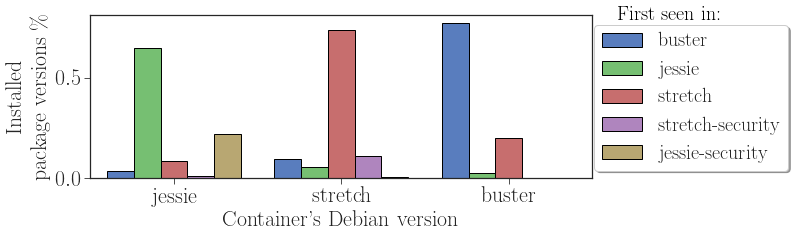

In [8]:
# Plot where UNIQUE packages were first seen 

first_seen_used=(sources_all.
                 #query('created>"2018"').
                 groupby(['debian','release_repo','package','version']).
                 count())
first_seen_used=first_seen_used.groupby(['debian','release_repo']).count()
first_seen_used.reset_index(inplace=True)
first_seen_used['usage']=first_seen_used[['debian','name']].apply(lambda x:
                                                                    x['name']/max(first_seen_used.query('debian=="buster"')['name'].cumsum()) if x['debian']=='buster'
                                                                    else x['name']/max(first_seen_used.query('debian=="stretch"')['name'].cumsum()) if x['debian']=='stretch'
                                                                    else x['name']/max(first_seen_used.query('debian=="jessie"')['name'].cumsum()),
                                                                    axis=1)

order=['jessie','stretch','buster']


ax = sns.barplot(x="debian", y="usage", 
                 hue="release_repo", data=first_seen_used, 
                 palette="muted", linewidth=1, order=order)
ax.figure.set_size_inches(9,3)
ax.set_xlabel("Container's Debian version")
ax.set_ylabel('Installed \n package versions \%')
for patch in ax.patches:
    patch.set_edgecolor('black')
ax.legend(loc='upper right', bbox_to_anchor=(1.41, 1), fontsize=20, fancybox=True, shadow=True)
ax.text(1.05, 1.05, 'First seen in: ', transform=ax.transAxes, fontsize=20,
        verticalalignment='top', color='black')
#ax.figure.savefig('../../seneca_research/docker_debian/figures/first_seen_in.pdf', bbox_inches='tight', facecolor='white')

# Let's see if packages are outdated


In [43]:
debian_packages_order=pd.read_csv('../../docker/csv/used/debian_packages_order_4mai.csv', sep=";")

In [217]:
# Create the dataframe with outdates
df=debian_packages_order.loc[:,['package','version','version_order','last_order','latest']]

# Official
outdate_official=official_sources.set_index(['package','version']).merge(
    df.set_index(['package','version']),
    left_index=True, 
    right_index=True, 
    how='outer').dropna().reset_index()

outdate_official['outdate']=outdate_official['last_order']-outdate_official['version_order']
outdate_official['isOutdate']=outdate_official['outdate'].apply(lambda x: 'Outdated' if x!=0
                                                                 else 'Up-to-date')
# Community
outdate_community=community_sources.set_index(['package','version']).merge(
    df.set_index(['package','version']),
    left_index=True, 
    right_index=True, 
    how='outer').dropna().reset_index()

outdate_community['outdate']=outdate_community['last_order']-outdate_community['version_order']
outdate_community['isOutdate']=outdate_community['outdate'].apply(lambda x: 'Outdated' if x!=0
                                                                 else 'Up-to-date')
print('Outdated Community packages:', len(outdate_community))
print('Outdated Official packages:', len(outdate_official))

Outdated Community packages: 1378241
Outdated Official packages: 561645


In [219]:
debian_packages_order.head()

,package,release_snapshot,version,date,source,source_version,order_n,version_order,last_order,latest
0,abiword,buster,3.0.2-3,20170828,abiword,3.0.2-3,26.0,1,5,3.0.2-6
1,abiword,buster,3.0.2-3+b1,20170908,abiword,3.0.2-3,27.0,2,5,3.0.2-6
2,abiword,buster,3.0.2-4,20171017,abiword,3.0.2-4,28.0,3,5,3.0.2-6
3,abiword,buster,3.0.2-5,20171222,abiword,3.0.2-5,29.0,4,5,3.0.2-6
4,abiword,buster,3.0.2-6,20180317,abiword,3.0.2-6,30.0,5,5,3.0.2-6


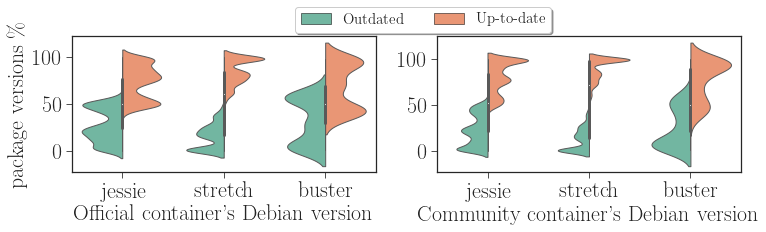

In [78]:
# Plot how many are out of date per CONTAINER
dff=pd.concat([outdate_official,outdate_community])#.query('created>"2018"')
dff=dff.groupby(['package','version','name','debian','type','isOutdate']).count().loc[:,[]].reset_index()

dff1=dff.groupby(['name','debian','type','isOutdate']).count().loc[:,['package']].reset_index()
dff2=dff.groupby(['name','debian','type']).count().reset_index().loc[:,['name','version']]

dff=(dff1.
     merge(
         dff2,
         left_on='name',
         right_on='name',
         how='left').
     assign(installed=lambda d: (d['package']*100/d['version']).apply(int)).
     drop(['version','package'], axis=1)
    )

fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)

order=['jessie','stretch','buster']

for index, type in enumerate(['Official', 'Community']):
    data=dff.query('type=="'+type+'"')
    ax = sns.violinplot(x="debian", y="installed", hue="isOutdate",
                     data=data, palette="Set2", order=order, hue_order=['Outdated','Up-to-date'], linewidth=1,
                    ax=axes[index], split=True)
    ax.figure.set_size_inches(12,2.5)
    ax.set_ylabel('package versions \%')
    for patch in ax.patches:
        patch.set_edgecolor('black')
    ax.legend('',bbox_to_anchor=(1.3, 1.3))
    ax.set_xlabel(type+" container's Debian version")
ax.set_ylabel('')
ax.legend(loc='upper right', bbox_to_anchor=(0.4, 1.27), ncol=3, fontsize=15, fancybox=True, shadow=True)
#ax.figure.savefig('../../../seneca_research/docker_debian/figures/up_out_date.pdf', bbox_inches='tight', facecolor='white')

In [54]:
scipy.stats.normaltest(data.query('isOutdate=="Outdated"').installed)

NormaltestResult(statistic=947.4631257665186, pvalue=1.8238803164429466e-206)

In [52]:
scipy.stats.normaltest(data.query('isOutdate!="Outdated"').installed)

NormaltestResult(statistic=808.18960827186265, pvalue=3.190482728895375e-176)

In [29]:
print('Up to date median "Community"',dff.query('isOutdate=="Up-to-date" and type=="Community"').installed.median())
print('Up to date median "Official"',dff.query('isOutdate=="Up-to-date" and type=="Official"').installed.median())
print('Up to date median "ALL"',dff.query('isOutdate=="Up-to-date"').installed.median())


Up to date median "Community" 85.0
Up to date median "Official" 78.0
Up to date median "ALL" 82.0


In [30]:
# Statistical test with CliffDelta
for x in ['jessie','stretch','buster']:
    sample1=dff.query('isOutdate=="Up-to-date" and debian=="'+x+'" and type=="Official"').installed
    sample2=dff.query('isOutdate=="Up-to-date" and debian=="'+x+'" and type=="Community"').installed
    print(scipy.stats.mannwhitneyu(sample2,sample1), cliffsDelta(sample2,sample1))
    print('median',x,'\t\tofficial',sample1.median(), 'community',sample2.median())

d=0.2330075364406826
MannwhitneyuResult(statistic=2319009.0, pvalue=7.1048902603575025e-43) True
median jessie 		official 76.0 community 81.0
d=0.28296500206782466
MannwhitneyuResult(statistic=277406.5, pvalue=5.0284713124112729e-24) True
median stretch 		official 84.0 community 98.0
d=0.2168217054263566
MannwhitneyuResult(statistic=5051.5, pvalue=0.0027841700215156481) True
median buster 		official 69.0 community 88.0


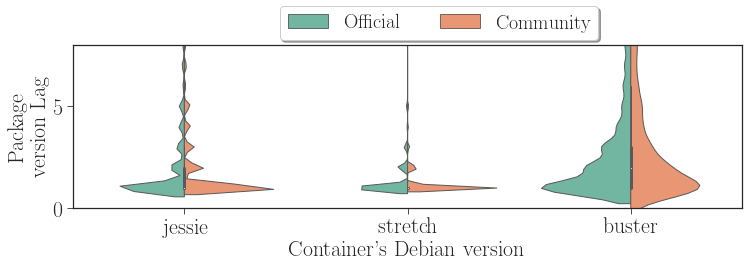

In [82]:
#### For those who are outdated! what is the technical lag

dff=pd.concat([outdate_official,outdate_community]).query('outdate!=0')

order=['jessie','stretch','buster']

ax = sns.violinplot(x="debian", y="outdate", data=dff, hue='type', 
                    palette="Set2", order=order, linewidth=1, split=True)
ax.figure.set_size_inches(12,3)
ax.set_xlabel("Container's Debian version")
ax.set_ylabel('Package \n version Lag')
for patch in ax.patches:
    patch.set_edgecolor('black')
ax.legend(loc='upper right', bbox_to_anchor=(0.8, 1.3), ncol=3, fontsize=20, fancybox=True, shadow=True)

ax.set_ylim(0,8)
#ax.figure.savefig('../../../seneca_research/docker_debian/figures/version_lag.png', bbox_inches='tight', facecolor='white')

In [61]:
print(
    scipy.stats.normaltest(dff.query('debian=="jessie"').outdate),'\n',
    scipy.stats.normaltest(dff.query('debian=="stretch"').outdate),'\n',
    scipy.stats.normaltest(dff.query('debian=="buster"').outdate)
)

NormaltestResult(statistic=199226.59451142949, pvalue=0.0) 
 NormaltestResult(statistic=73249.35985857145, pvalue=0.0) 
 NormaltestResult(statistic=6701.3929051050845, pvalue=0.0)


In [64]:
print(
    scipy.stats.skew(dff.query('debian=="jessie"').outdate),'\n',
    scipy.stats.skew(dff.query('debian=="stretch"').outdate),'\n',
    scipy.stats.skew(dff.query('debian=="buster"').outdate)
)

3.107175484206795 
 7.38030267402652 
 2.104008697147934


In [65]:
print(
    scipy.stats.kurtosis(dff.query('debian=="jessie"').outdate),'\n',
    scipy.stats.kurtosis(dff.query('debian=="stretch"').outdate),'\n',
    scipy.stats.kurtosis(dff.query('debian=="buster"').outdate)
)

14.272852093317322 
 99.1780809367606 
 5.26319859191617


In [66]:
print(
    scipy.stats.kurtosistest(dff.query('debian=="jessie"').outdate),'\n',
    scipy.stats.kurtosistest(dff.query('debian=="stretch"').outdate),'\n',
    scipy.stats.kurtosistest(dff.query('debian=="buster"').outdate)
)

KurtosistestResult(statistic=248.4016262892203, pvalue=0.0) 
 KurtosistestResult(statistic=146.7764507427425, pvalue=0.0) 
 KurtosistestResult(statistic=42.372130197567408, pvalue=0.0)


In [36]:
for x in ['jessie','stretch','buster']:
    print(x,dff.query('debian=="'+x+'" and type=="Official"').outdate.mean(),
          x,dff.query('debian=="'+x+'" and type=="Official"').outdate.median(),'\n',
          x,dff.query('debian=="'+x+'" and type=="Community"').outdate.mean(),
          x,dff.query('debian=="'+x+'" and type=="Community"').outdate.median(),'\n')


jessie 2.137435331165777 jessie 1.0 
 jessie 1.9345266394893634 jessie 1.0 

stretch 1.3682512270496274 stretch 1.0 
 stretch 1.2401006409872402 stretch 1.0 

buster 2.7150595882990247 buster 2.0 
 buster 3.0563760806916425 buster 2.0 



################ It seems that packages are up to date ################
################ Let's check when they were first seen ################

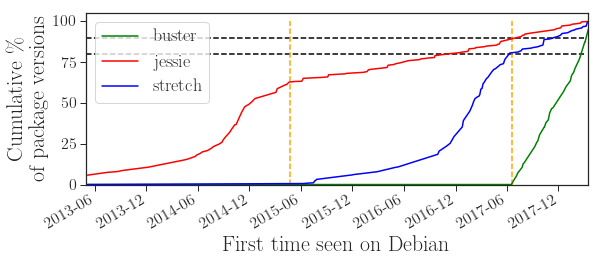

In [406]:
### When UNIQUE package versions that are NOT outdated were first seen
dff=pd.concat([outdate_official,outdate_community])#.query('outdate!=0')

order=['jessie','stretch','buster']

#dff.assign(new=lambda d: d['release_snapshot']+'_'+d['isOutdate'])

dff=(dff.
 groupby(['package','version','date','release_snapshot']).
 count().
 reset_index().
 groupby(['date','release_snapshot']).
 count().
 loc[:,['package']].
 reset_index())

dff=(dff.
    pivot(index='date', columns='release_snapshot', values='package').
    fillna(0).
    reset_index().
    sort_values('date', ascending=True))

dff['date']=dff['date'].apply(lambda x: datetime.strptime(x, "%Y%m%d"))
dff.set_index('date', inplace=True)

for x in dff:
    dff[x]=dff[x].cumsum()
    max=dff[x].values.max()
    dff[x]=dff[x]*100/max
    #df.drop([x], axis=1, inplace=True)


ax=dff.plot( color=['green','red','blue'])#, ax=axes[int(i/2)][j], label=type)    
ax.hlines(80, pd.to_datetime('2013-05-01'), pd.to_datetime('2018-03-01'), colors='black', linestyles='dashed', alpha=1)
ax.hlines(90, pd.to_datetime('2013-05-01'), pd.to_datetime('2018-03-01'), colors='black', linestyles='dashed', alpha=1)

ax.set_ylim(0,)
ax.set_ylabel('Cumulative \% \n of package versions')
ax.set_xlabel('First time seen on Debian')
ax.figure.set_size_inches(9,3.5)
plt.tick_params(axis='both', which='major', labelsize=16, width=1)
L=plt.legend(loc='upper left', prop={'size': 18})
plt.setp(L.texts, family='Consolas')

ax.set_xlim(pd.to_datetime('2013-05-01'), pd.to_datetime('2018-03-17'))

ax.vlines(pd.to_datetime('2015-04-25'), 0,100, colors='orange', linestyles='dashed', alpha=1)
ax.vlines(pd.to_datetime('2017-06-18'), 0,100, colors='orange', linestyles='dashed', alpha=1)
#ax.figure.savefig('../../seneca_research/docker_debian/figures/first_seen_when.pdf', bbox_inches='tight', facecolor='white')

# ################################################### VULNERABILITIES

In [83]:
# Vulnerabilities
docker_vulnerabilities=pd.read_csv('../../docker/csv/used/docker_vulnerabilities.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)
docker_vulnerabilities['urgency']=docker_vulnerabilities['urgency'].apply(lambda x: 'not assigned' if 'not' in x
                                                                        else x)
docker_vulnerabilities['urgency']=docker_vulnerabilities['urgency'].apply(lambda x: x.split('*')[0])
docker_vulnerabilities.drop_duplicates(inplace=True)
len(docker_vulnerabilities)

25686

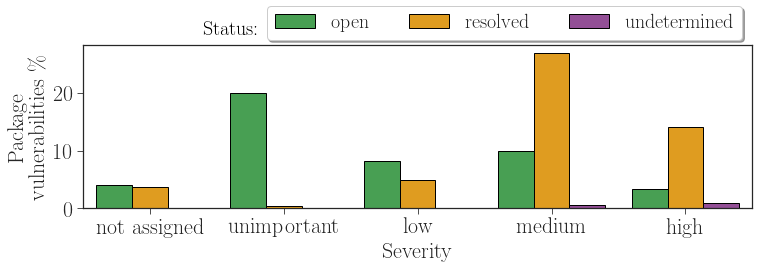

In [162]:

vuls=docker_vulnerabilities.groupby(['urgency','status']).count().reset_index()
vuls['source']=vuls['source']*100/len(docker_vulnerabilities)
vuls=vuls.sort_values('urgency', ascending=False)
flatui = [sns.xkcd_rgb["medium green"], "orange", sns.xkcd_rgb["medium purple"], "#e74c3c", "#34495e", "#2ecc71"]

ax = sns.barplot(x="urgency", 
                 y="source", 
                 hue="status", 
                 order=['not assigned','unimportant', 'low', 'medium', 'high'],
                 data=vuls, 
                 palette=flatui, 
                 linewidth=1)
ax.figure.set_size_inches(12,3)
ax.set_xlabel("Severity")
ax.set_ylabel('Package \n vulnerabilities \%')
for patch in ax.patches:
    patch.set_edgecolor('black')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.3), ncol=3, fontsize=20, fancybox=True, shadow=True)
ax.text(0.18, 1.15, 'Status:', transform=ax.transAxes, fontsize=20,
        verticalalignment='top', color='black')
ax.figure.savefig('../../../seneca_research/docker_debian/figures/all_vuls.pdf', bbox_inches='tight', facecolor='white')

In [137]:
vuls=docker_vulnerabilities.groupby(['status']).count().reset_index()
vuls['source']=(vuls['source']*100/len(docker_vulnerabilities)).apply(lambda x: "%.1f" % x)
vuls

,status,source,source_version,urgency,fixed_version,debianbug,release,cve
0,open,48.6,12479,12479,12479,12479,12479,12479
1,resolved,49.9,12806,12806,12806,12806,12806,12806
2,undetermined,1.6,401,401,401,401,401,401


In [85]:
###### Vulnerabilities with packages
lag_vul_all=pd.read_csv('../../docker/csv/used/lag_vul_all_correct.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)
lag_vul_all['urgency']=lag_vul_all['urgency'].apply(lambda x: x.split('*')[0])
lag_vul_all['urgency']=lag_vul_all['urgency'].apply(lambda x: 'not assigned' if 'not' in x
                                                                        else x)
lag_vul_all=lag_vul_all.query('status!="resolved" or isOutdate!="Up-to-date"')
lag_vul_all=lag_vul_all.query('status!="end-of-life"')
len(lag_vul_all)

9862939

In [88]:
vuls=lag_vul_all[['name','urgency']].drop_duplicates().groupby(['urgency']).count().reset_index()
vuls['name']=vuls['name']*100/7380
vuls

,urgency,name
0,end-of-life,0.135501
1,high,100.000000
2,low,100.000000
3,medium,100.000000
4,not assigned,96.178862
5,unimportant,100.000000


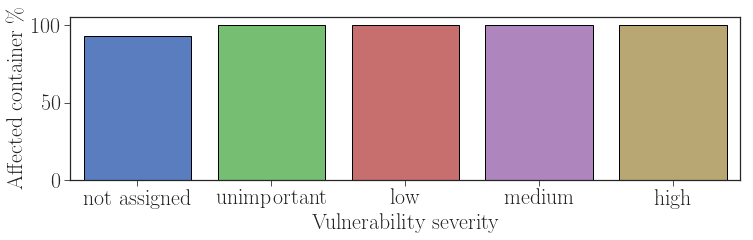

In [61]:

vuls=lag_vul_all[['name','urgency']].drop_duplicates().groupby(['urgency']).count().reset_index()
vuls['name']=vuls['name']*100/7380

ax = sns.barplot(x="urgency", 
                 y="name", 
                 order=['not assigned','unimportant', 'low', 'medium', 'high'],
                 data=vuls, 
                 palette="muted", 
                 linewidth=1)
ax.figure.set_size_inches(12,3)
ax.set_xlabel("Vulnerability severity")
ax.set_ylabel('Affected container \%')
for patch in ax.patches:
    patch.set_edgecolor('black')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.3), ncol=3, fontsize=20, fancybox=True, shadow=True)
#ax.figure.savefig('../../seneca_research/docker_debian/figures/affected-vuls.pdf', bbox_inches='tight', facecolor='white')

In [398]:
# In case we want only unique cves per container
if False:
    lag_vul_all=lag_vul_all.loc[:,['name','source','source_version','created','cve','debian','date','isOudate',
                  'urgency','type','status','release_snapshot']]
    lag_vul_all=lag_vul_all.drop_duplicates()
    len(lag_vul_all)

(0, 6000)

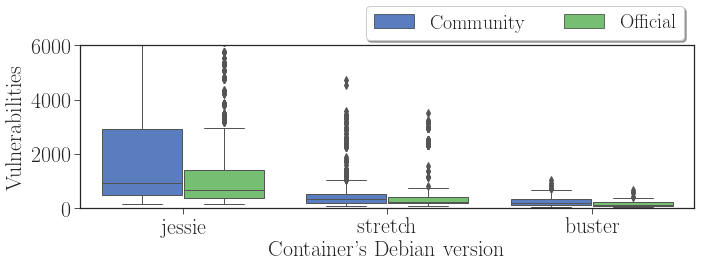

In [178]:
######### concatinating both dataframes : offical and community
if True:
    df_tmp=(lag_vul_all.
            groupby(['name','debian','type']).
            count().
            sort_values('source', ascending=False).
            reset_index()
           )

order=['jessie','stretch','buster']

ax = sns.boxplot(x="debian", y="source", data=df_tmp, hue="type", palette="muted", order=order, linewidth=1)
ax.figure.set_size_inches(11,3)
ax.set_xlabel("Container's Debian version")
ax.set_ylabel('Vulnerabilities')
for patch in ax.patches:
    patch.set_edgecolor('black')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.3), ncol=3, fontsize=20, fancybox=True, shadow=True)
ax.set_ylim(0,6000)

#ax.figure.savefig('../../seneca_research/docker_debian/figures/vuls_container.pdf', bbox_inches='tight', facecolor='white')

In [179]:

for x in ['jessie','stretch','buster']:
    print(x)
    print(df_tmp.query('type=="Official"').query('debian=="'+x+'"').cve.min(),
          df_tmp.query('type=="Official"').query('debian=="'+x+'"').cve.median(),
          df_tmp.query('type=="Official"').query('debian=="'+x+'"').cve.max(),
      df_tmp.query('type=="Community"').query('debian=="'+x+'"').cve.min(),
         df_tmp.query('type=="Community"').query('debian=="'+x+'"').cve.median(),
         df_tmp.query('type=="Community"').query('debian=="'+x+'"').cve.max())


jessie
155 658.0 7106 155 916.0 7338
stretch
85 242.0 3498 75 336.5 4729
buster
34 134.0 659 41 183.5 1035


In [147]:
for x in ['jessie','stretch','buster']:
    print(x)
    cliffsDelta(df_tmp.query('type=="Community"').query('debian=="'+x+'"').cve, 
            df_tmp.query('type=="Official"').query('debian=="'+x+'"').cve)

jessie
d=0.16707554581852646
stretch
d=0.11393196856906534
buster
d=0.29441860465116276


In [156]:
for x in ['jessie','stretch','buster']:
    print(x,scipy.stats.mannwhitneyu(df_tmp.query('type=="Community"').query('debian=="'+x+'"').cve, 
            df_tmp.query('type=="Official"').query('debian=="'+x+'"').cve))

jessie MannwhitneyuResult(statistic=2518355.0, pvalue=5.8454019583872486e-23)
stretch MannwhitneyuResult(statistic=342802.0, pvalue=2.9645476715352498e-05)
buster MannwhitneyuResult(statistic=4551.0, pvalue=8.4346179649447399e-05)


In [113]:
print('Official')

print(len(official_sources['package'].drop_duplicates()),
len(official_sources[['package','version']].drop_duplicates()))

print(len(official_sources['source'].drop_duplicates()),
len(official_sources[['source','source_version']].drop_duplicates()))

print('Community')
print(len(community_sources['package'].drop_duplicates()),
len(community_sources[['package','version']].drop_duplicates()))


print(len(community_sources['source'].drop_duplicates()),
len(community_sources[['source','source_version']].drop_duplicates()))


Official
1967 5345
861 2268
Community
7914 16601
3949 7519


In [114]:
print('how many source packages:',len(sources_all['source'].drop_duplicates()))
print('how many source package version:',len(sources_all[['source','source_version']].drop_duplicates()))
print('how many vulnerables sources:',len(lag_vul_all['source'].drop_duplicates()))


how many source packages: 3975
how many source package version: 7631
how many vulnerables sources: 488


In [115]:
if True:
    giiiz=lag_vul_all.query('status!="resolved" or isOutdate!="Up-to-date"')
    df_tmp=(giiiz.#query('status=="resolved"').
            groupby(['name','debian','type']).
            count().
            loc[:,['package']].
            reset_index()
           )
    df_tmp2=(giiiz.query('isOutdate=="Out-of-date"').#query('status=="resolved"').
             groupby(['name','debian','type','package','version']).
             count().
             loc[:,[]].
             reset_index().
             groupby(['name','debian','type']).
             count().
             reset_index().
             #query('isOutdate=="Up-to-date"').
             loc[:,['version','name']]
            )
    
    df_tmp3=(df_tmp2.merge(
        df_tmp,
        left_on='name',
        right_on='name',
        how='left')
            )
df_tmp3['version']=df_tmp3['version'].apply(int)

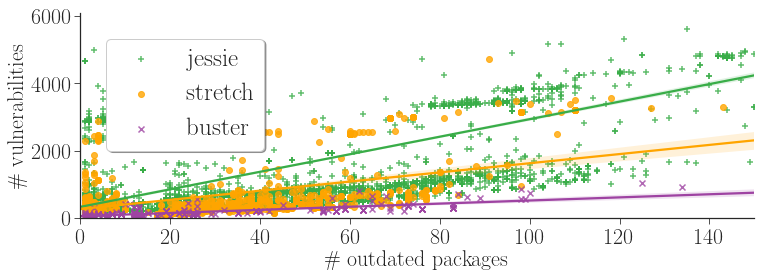

In [119]:
order=['jessie','stretch','buster']
ax = sns.lmplot(x="version", y="package", markers=["+", 'o','x'], 
                hue="debian", palette=flatui, data=df_tmp3, 
                size=8, legend='', hue_order=order)
ax.fig.set_size_inches(12,3.5)
ax.set_ylabels('\# vulnerabilities')
ax.set_xlabels('\# outdated packages')
ax.fig.legend(loc='upper right', bbox_to_anchor=(0.32, 1), fontsize=25, fancybox=True, shadow=True)# ,ncol=3)
ax.set(ylim=(0,6100), xlim=(0,150))

ax.fig.savefig('../../../seneca_research/docker_debian/figures/vuls_outdate.pdf', bbox_inches='tight', facecolor='white')

In [117]:
for x in ['jessie','stretch','buster']:
    test=df_tmp3.query('debian=="'+x+'"')
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(test.version,
                                                                         test.package)
    print("r-squared:", r_value**2)

r-squared: 0.490954830505
r-squared: 0.178027652171
r-squared: 0.597546907859


In [135]:
print('Up to date and only Resolved')
for x in ['jessie','stretch','buster']:
    test=df_tmp3.query('debian=="'+x+'"')
    print(x,scipy.stats.pearsonr(test.package, test.version),'\n')
    
for x in ['jessie','stretch','buster']:
    test=df_tmp3.query('debian=="'+x+'"')
    print(x,scipy.stats.spearmanr(test.package, test.version),'\n')
    
for x in ['jessie','stretch','buster']:
    test=df_tmp3.query('debian=="'+x+'"')
    print(x,scipy.stats.kendalltau(test.package, test.version),'\n')

Up to date and only Resolved
jessie (0.70068168986025992, 0.0) 

stretch (0.42193323188776333, 1.5205218023290048e-68) 

buster (0.77301158326296349, 9.3148889006444502e-47) 

jessie SpearmanrResult(correlation=0.62905949128386929, pvalue=0.0) 

stretch SpearmanrResult(correlation=0.53314137868268829, pvalue=1.4157210872521007e-115) 

buster SpearmanrResult(correlation=0.72531170966161851, pvalue=1.1325510468391085e-38) 

jessie KendalltauResult(correlation=0.50529609825245947, pvalue=0.0) 

stretch KendalltauResult(correlation=0.40051536433339013, pvalue=2.4580543996952644e-118) 

buster KendalltauResult(correlation=0.56322125000921708, pvalue=2.2073926428522342e-35) 



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

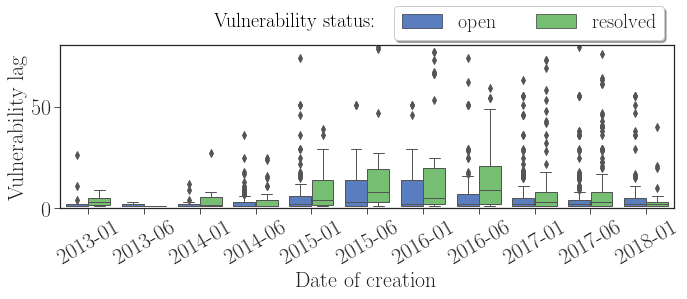

In [169]:
if True:
    df_tmp=lag_vul_all.query('date!="qfqf"')
    df_tmp['date']=df_tmp['date'].apply(lambda x: 
                                          x[0:4]+'-01' if str(int(x[4:6])/7)[0:1] == "0"
                                         else x[0:4]+'-06' )
    #df_tmp['date']=df_tmp['date'].apply(lambda x: datetime.date(x, "%Y-%m"))
if True:
    df_tmp=(df_tmp.query('status=="resolved" or status=="open"').
            loc[:,['source','source_version','date','status','release_snapshot','outdate','cve']])
    df_tmp.drop_duplicates(inplace=True)
    df_tmp=df_tmp.groupby(['source','source_version','date','status','cve']).count().reset_index()
    df_tmp=df_tmp.groupby(['source','source_version','date','status']).count().reset_index()
    
df_tmp.sort_values('date', ascending=True, inplace=True)
ax = sns.boxplot(x="date", y="cve", hue="status", data=df_tmp,  palette="muted", linewidth=1)
ax.figure.set_size_inches(11,3)
for patch in ax.patches:
    patch.set_edgecolor('black')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.3), ncol=3, fontsize=20, fancybox=True, shadow=True)
ax.text(0.25, 1.2, 'Vulnerability status:', transform=ax.transAxes, fontsize=20,
        verticalalignment='top', color='black')

ax.set_xlabel('Date of creation')
ax.set_ylabel('Vulnerability lag')
ax.set_ylim(0,80)
plt.xticks(rotation='30')



(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

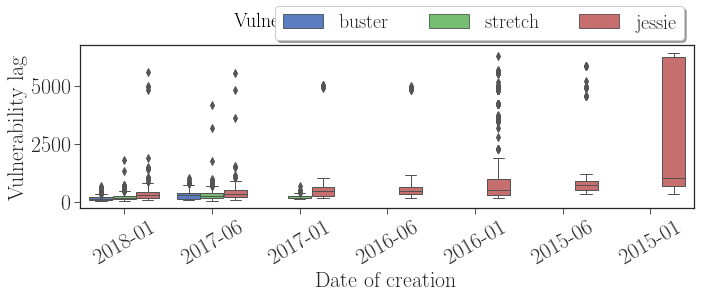

In [95]:
if True:
    df_tmp=lag_vul_all.query('date!="qfqf"')
    df_tmp['created']=df_tmp['created'].apply(lambda x: 
                                          x[0:4]+'-01' if str(int(x[5:7])/7)[0:1] == "0"
                                         else x[0:4]+'-06' )
    df_tmp=df_tmp.groupby(['name','debian','created']).count().reset_index()
    
df_tmp.sort_values('date', ascending=True, inplace=True)
ax = sns.boxplot(x="created", y="cve", hue="debian", data=df_tmp,  palette="muted", linewidth=1)
ax.figure.set_size_inches(11,3)
for patch in ax.patches:
    patch.set_edgecolor('black')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.3), ncol=3, fontsize=20, fancybox=True, shadow=True)
ax.text(0.25, 1.2, 'Vulnerability status:', transform=ax.transAxes, fontsize=20,
        verticalalignment='top', color='black')

ax.set_xlabel('Date of creation')
ax.set_ylabel('Vulnerability lag')
#ax.set_ylim(0,80)
plt.xticks(rotation='30')



(0, 400)

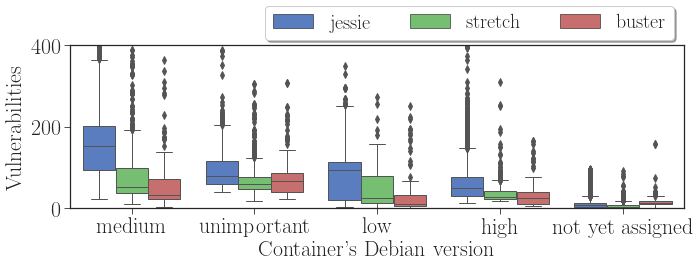

In [93]:
######### concatinating both dataframes : offical and community
if True:
    lag_vul_all["urgency"]=lag_vul_all["urgency"].apply(lambda x: x.split('*')[0])
    df_tmp=(lag_vul_all.
            groupby(['name','debian','urgency']).
            count().
            sort_values('source', ascending=False).
            reset_index()
           )

#order=['jessie','stretch','buster']

ax = sns.boxplot(x="urgency", y="source", data=df_tmp, hue="debian", palette="muted", linewidth=1)#, order=order)
ax.figure.set_size_inches(11,3)
ax.set_xlabel("Container's Debian version")
ax.set_ylabel('Vulnerabilities')
for patch in ax.patches:
    patch.set_edgecolor('black')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.3), ncol=3, fontsize=20, fancybox=True, shadow=True)
ax.set_ylim(0,400)

Which containers and packages are the most vulnerable

In [120]:
community_images=pd.read_csv('../../docker/csv/docker_images_com.csv', sep=',', dtype=object, index_col=None,  error_bad_lines=False)
community_images.drop_duplicates(inplace=True)
community_images['name']=community_images['name'].apply(lambda x: x.replace('/',':'))
official_images=pd.read_csv('../../docker/csv/docker_images_store.csv', sep=';', usecols=['slug','popularity'],
                            dtype=object, index_col=None,  )

In [121]:
pop=lag_vul_all.query('type=="Official"').groupby(['name','created']).count()[['cve']].sort_values('cve', ascending=False).reset_index()
pop['slug']=pop['name'].apply(lambda x: x.split(':')[0])
pop=pop.groupby('slug').first().reset_index().sort_values('cve', ascending=False)
pop=(pop.
     merge(official_images,
           left_on='slug',
           right_on='slug',
           how='left').dropna().reset_index()
    )
for row in pop.head(11).iterrows():
    age=str(row[1]['created'])
    age=datetime.strptime(age,"%Y-%m-%d")
    age=((datetime.now() - age).days/30)
    age=str(round(age,2))
    cve=str(row[1]['cve'])
    print(row[1]['name'],'\\\\','('+cve+', '+age+')')
    #print('\\begin{tabular}[c]{@{}l@{}}',row[1]['name'],'\\\\','('+cve+', '+age+')','\\end{tabular}  &  ')


perl:5.12.5-threaded \\ (7106, 40.97)
node:0.8.28 \\ (6889, 37.9)
erlang:18.2.1 \\ (6713, 33.37)
ruby:2.1.8 \\ (6426, 30.83)
sentry:7.5.0 \\ (5742, 40.9)
pypy:2-2.5.1 \\ (5742, 40.93)
python:2.7.9 \\ (5742, 41.13)
gcc:6.1.0 \\ (5288, 25.5)
hylang:0.12.1 \\ (3847, 16.1)
elixir:1.4.4 \\ (3843, 15.7)
redmine:3.1.3-passenger \\ (3388, 31.57)


In [216]:
pop=lag_vul_all.query('type=="Community"').groupby(['name','created']).count()[['cve']].sort_values('cve', ascending=False).reset_index()
#pop['slug']=pop['name'].apply(lambda x: x.split(':')[0])
#pop=pop.groupby('name').first().reset_index().sort_values('cve', ascending=False)
pop=(pop.
     merge(community_images,
           left_on='name',
           right_on='name',
           how='left').dropna().reset_index()
    )
pop=pop.sort_values('cve', ascending=False)
for row in pop.head(11).iterrows():
    name=row[1]['name'].replace(':','/')
    age=str(row[1]['created'])
    age=datetime.strptime(age,"%Y-%m-%d")
    age=((datetime.now() - age).days/30)
    age=str(round(age,2))
    cve=str(row[1]['cve'])
    print(name[0:23],'\\\\',name[23:],'('+cve+', '+age+')')
    #print('\\begin{tabular}[c]{@{}l@{}}',name[0:23],'\\\\',name[23:],'('+cve+', '+age+')','\\end{tabular}  \\\\ \\hline ')
    
    
print('---------------- least')

\begin{tabular}[c]{@{}l@{}} weboaks/chromium-xvfb-n \\ ode (7338, 27.83) \end{tabular}  \\ \hline 
\begin{tabular}[c]{@{}l@{}} jmoifutu/almakioski-con \\ tent-processor-base (7282, 35.2) \end{tabular}  \\ \hline 
\begin{tabular}[c]{@{}l@{}} suitupalex/node-compose \\ r (7167, 26.17) \end{tabular}  \\ \hline 
\begin{tabular}[c]{@{}l@{}} youdowell/php-fpm-for-w \\ ordpress (7155, 25.53) \end{tabular}  \\ \hline 
\begin{tabular}[c]{@{}l@{}} newsdev/github-keys \\  (7106, 35.47) \end{tabular}  \\ \hline 
\begin{tabular}[c]{@{}l@{}} jmvrbanac/hastebin \\  (7106, 35.93) \end{tabular}  \\ \hline 
\begin{tabular}[c]{@{}l@{}} devdetonator/protractor \\  (7106, 35.73) \end{tabular}  \\ \hline 
\begin{tabular}[c]{@{}l@{}} kosmtik/kosmtik \\  (7106, 35.7) \end{tabular}  \\ \hline 
\begin{tabular}[c]{@{}l@{}} misterbisson/couchbase- \\ cloud-benchmark (7106, 35.7) \end{tabular}  \\ \hline 
\begin{tabular}[c]{@{}l@{}} pelle/ruby-phantomjs \\  (7013, 35.63) \end{tabular}  \\ \hline 
\begin{tabular}[c

In [128]:
top_pck=sources_all[['name','source']].drop_duplicates()
top_pck=top_pck.groupby('source').count().sort_values('name', ascending=False).reset_index()

top=docker_vulnerabilities[['source','cve']].drop_duplicates()
top=top.groupby('source').count()[['cve']].reset_index()

top=(top.
     merge(top_pck,
           left_on="source",
           right_on='source',
           how='left').dropna()
    )
top['name']=top['name'].apply(lambda x: round(int(x)/73.80,2))
top=top.sort_values(['cve','name'],ascending=False)
for row in top.head(11).iterrows():
    name=str(row[1]['source'])
    cve=str(row[1]['cve'])
    popularity=str(row[1]['name'])
    print(name,'('+cve+')', popularity+'\\%')
    


linux (433) 54.51\%
chromium-browser (419) 0.43\%
imagemagick (327) 28.13\%
php5 (186) 2.3\%
firefox-esr (139) 0.09\%
openjdk-7 (136) 3.69\%
tcpdump (132) 0.19\%
binutils (124) 53.55\%
qemu (117) 0.22\%
mysql-5.5 (103) 26.82\%
tiff (101) 49.81\%


In [134]:
print('____________least')
for row in top.query('cve==1').head(10).iterrows():
    name=str(row[1]['source'])
    cve=str(row[1]['cve'])
    popularity=str(row[1]['name'])
    print('&',name,'('+cve+') &', popularity+'\\% \\\\ \n ')

____________least
& audit (1) & 100.0\% \\ 
 
& bzip2 (1) & 100.0\% \\ 
 
& db5.3 (1) & 100.0\% \\ 
 
& pam (1) & 100.0\% \\ 
 
& sensible-utils (1) & 98.97\% \\ 
 
& libffi (1) & 94.13\% \\ 
 
& cyrus-sasl2 (1) & 88.79\% \\ 
 
& libssh2 (1) & 82.64\% \\ 
 
& cryptsetup (1) & 73.43\% \\ 
 
& libbsd (1) & 72.8\% \\ 
 


In [341]:
# Here we check relation between number of binary packages and vulnerabilities
top['package']=top['package'].apply(int)
scipy.stats.spearmanr(top.cve,  top.package)

SpearmanrResult(correlation=0.32938497565989672, pvalue=5.643196855264778e-13)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1506: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


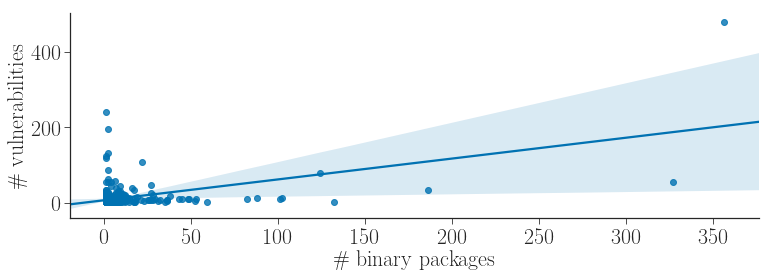

In [344]:
ax = sns.lmplot(x="cve", y="package",  palette='muted', data=top, 
                size=8, legend='')
ax.fig.set_size_inches(12,3.5)
ax.set_ylabels('\# vulnerabilities')
ax.set_xlabels('\# binary packages')
ax.fig.legend(loc='upper right', bbox_to_anchor=(0.8, 1.2), fontsize=25, fancybox=True, shadow=True,ncol=3)
#ax.set(xlim=(0,70), ylim=(0,6000), )



# NOW WE CHECK BUGS WITH THE INSTALLED PACKAGES


In [137]:
# BUGS
docker_bugs=pd.read_csv('../../docker/csv/docker_bugs_MAI_checked.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)
docker_bugs.drop_duplicates(inplace=True)
bug_order=['wishlist','minor','normal','important','serious','grave','critical']
docker_bugs=docker_bugs.query('status!="fixed" and status!="pending-fixed"')
docker_bugs['status']=docker_bugs['status'].apply(lambda x: "fixed" if x =="done" else x)
# Something about venn diagram
len(docker_bugs)

47604

In [138]:
# considering only security bugs
mask = docker_bugs['debianbug'].isin(docker_vulnerabilities.query('status=="resolved"')['debianbug'].drop_duplicates())
security_only=docker_bugs[mask]
print(len(security_only['debianbug'].drop_duplicates()),len(docker_vulnerabilities.query('status=="resolved"')['debianbug'].drop_duplicates()))

70 708


In [139]:
# NOT considering security bugs
mask = docker_bugs['debianbug'].isin(docker_vulnerabilities['debianbug'].drop_duplicates())
docker_bugs=docker_bugs[~mask]
len(docker_bugs)

47245

In [144]:
docker_bugs['severity']=docker_bugs['severity'].apply(lambda x:
                                                     'high' if x=="grave"
                                                     else 'high' if x=="serious"
                                                     else 'high' if x=="critical"
                                                     else x)

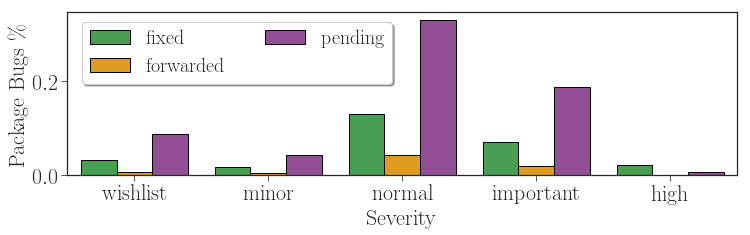

In [152]:

df_bug=docker_bugs.groupby(['severity','status']).count().reset_index()
df_bug['source']=df_bug['source']/len(docker_bugs)
df_bug=df_bug.sort_values('severity', ascending=False)

ax = sns.barplot(x="severity", 
                 y="source", 
                 hue="status", 
                 order=['wishlist','minor','normal','important','high'],
                 data=df_bug, 
                 palette=flatui, 
                 linewidth=1)
ax.figure.set_size_inches(12,3)
ax.set_xlabel("Severity")
ax.set_ylabel('Package Bugs \%')
for patch in ax.patches:
    patch.set_edgecolor('black')
ax.legend(loc='upper right', bbox_to_anchor=(0.5, 1), ncol=2, fontsize=20, fancybox=True, shadow=True)
ax.figure.savefig('../../../seneca_research/docker_debian/figures/all_bugs.pdf', bbox_inches='tight', facecolor='white')

In [153]:
vuls=docker_bugs.groupby(['status']).count().reset_index()
vuls['source']=(vuls['source']*100/len(docker_bugs)).apply(lambda x: "%.1f" % x)
vuls

,status,arrival,debianbug,last_modified,release,severity,source,source_version,type
0,fixed,12863,12863,12863,12863,12863,27.2,12863,12863
1,forwarded,3460,3460,3460,3460,3460,7.3,3460,3460
2,pending,30922,30922,30922,30922,30922,65.5,30922,30922


In [154]:
vuls=docker_bugs.groupby(['severity']).count().reset_index()
vuls['source']=(vuls['source']*100/len(docker_bugs)).apply(lambda x: "%.1f" % x)
vuls

,severity,arrival,debianbug,last_modified,release,source,source_version,status,type
0,high,1367,1367,1367,1367,2.9,1367,1367,1367
1,important,13087,13087,13087,13087,27.7,13087,13087,13087
2,minor,3141,3141,3141,3141,6.6,3141,3141,3141
3,normal,23732,23732,23732,23732,50.2,23732,23732,23732
4,wishlist,5918,5918,5918,5918,12.5,5918,5918,5918


In [156]:
###### Vulnerabilities with packages
lag_bug_all=pd.read_csv('../../docker/csv/used/lag_bug_all_MAI_check.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)
lag_bug_all.drop(['release_snapshot','release','created'], axis=1, inplace=True)
len(lag_bug_all)

15362304

In [270]:
print(len(docker_bugs['source'].drop_duplicates()),
len(docker_bugs[['source','source_version']].drop_duplicates()))

1994 3869


In [271]:
docker_bugs['source'].drop_duplicates().size/3975

0.5016352201257862

(0, 6000)

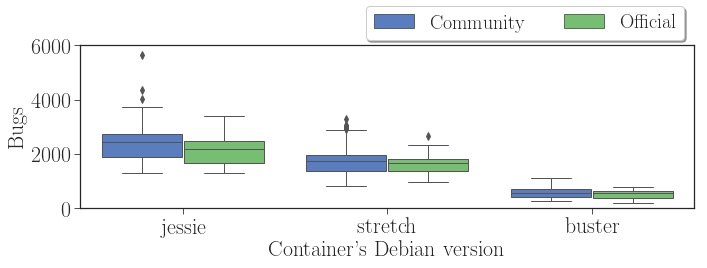

In [273]:
######### concatinating both dataframes : offical and community
if True:
    df_tmp=(lag_bug_all.
            groupby(['name','debian','type']).
            count().
            sort_values('source', ascending=False).
            reset_index()
           )

order=['jessie','stretch','buster']

ax = sns.boxplot(x="debian", y="source", data=df_tmp, hue="type", palette="muted", order=order, linewidth=1)
ax.figure.set_size_inches(11,3)
ax.set_xlabel("Container's Debian version")
ax.set_ylabel('Bugs')
for patch in ax.patches:
    patch.set_edgecolor('black')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.3), ncol=3, fontsize=20, fancybox=True, shadow=True)
ax.set_ylim(0,6000)

#ax.figure.savefig('../../seneca_research/docker_debian/figures/vuls_container.pdf', bbox_inches='tight', facecolor='white')

In [277]:
print(df_tmp.source.min(),
      df_tmp.source.median(),
     df_tmp.source.max())

213 2163.0 5628


In [281]:


for x in ['jessie','stretch','buster']:
    print(x)
    print(df_tmp.query('type=="Official"').query('debian=="'+x+'"').source.min(),
          df_tmp.query('type=="Official"').query('debian=="'+x+'"').source.median(),
          df_tmp.query('type=="Official"').query('debian=="'+x+'"').source.max(),
      df_tmp.query('type=="Community"').query('debian=="'+x+'"').source.min(),
         df_tmp.query('type=="Community"').query('debian=="'+x+'"').source.median(),
    df_tmp.query('type=="Community"').query('debian=="'+x+'"').source.max())


jessie
1307 2201.0 3415 1296 2450.0 5628
stretch
962 1683.0 2665 828 1759.0 3285
buster
213 560.0 776 278 561.0 1098


In [282]:
for x in ['jessie','stretch','buster']:
    print(x)
    cliffsDelta(df_tmp.query('type=="Community"').query('debian=="'+x+'"').source, 
            df_tmp.query('type=="Official"').query('debian=="'+x+'"').source)

jessie
d=0.28192800452586636
stretch
d=0.13625542803970223
buster
d=0.13015503875968992


In [26]:
len(lag_bug_all)

15362304

In [157]:
if True:
    df_tmp=(lag_bug_all.
            groupby(['name','debian','type']).
            count().
            loc[:,['source']].
            reset_index()
           )
    df_tmp2=(lag_bug_all.query('isOutdate=="Out-of-date"').#query('status=="resolved"').
             groupby(['name','debian','type','source','source_version']).
             count().
             reset_index().
             groupby(['name','debian','type']).
             count().
             reset_index().
             loc[:,['severity','name']]
            )
    
    df_tmp3=(df_tmp2.merge(
        df_tmp,
        left_on='name',
        right_on='name',
        how='left')
            )
df_tmp3['severity']=df_tmp3['severity'].apply(int)

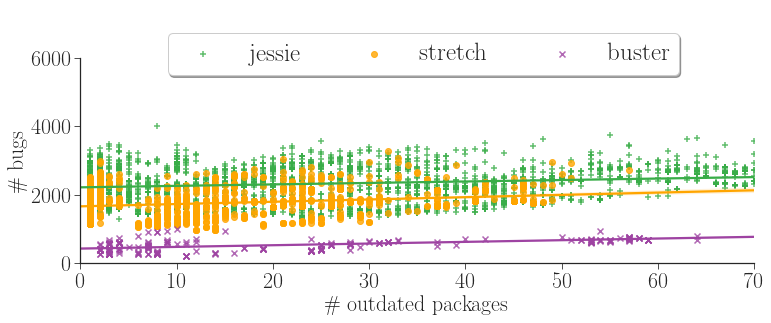

In [160]:
order=['jessie','stretch','buster']
ax = sns.lmplot(x="severity", y="source", markers=["+", 'o','x'], 
                hue="debian", palette=flatui, data=df_tmp3, 
                size=8, legend='', hue_order=order)
ax.fig.set_size_inches(12,3.5)
ax.set_ylabels('\# bugs')
ax.set_xlabels('\# outdated packages')
ax.fig.legend(loc='upper right', bbox_to_anchor=(0.8, 1.2), fontsize=25, fancybox=True, shadow=True,ncol=3)
ax.set(xlim=(0,70), ylim=(0,6000), )

ax.fig.savefig('../../../seneca_research/docker_debian/figures/bugs_outdate.pdf', bbox_inches='tight', facecolor='white')

In [164]:
print('Up to date and only Resolved')
for x in ['jessie','stretch','buster']:
    test=df_tmp3.query('debian=="'+x+'"')
    print(x,scipy.stats.pearsonr(test.source, test.severity),'\n')
    
for x in ['jessie','stretch','buster']:
    test=df_tmp3.query('debian=="'+x+'"')
    print(x,scipy.stats.spearmanr(test.source, test.severity),'\n')
    
for x in ['jessie','stretch','buster']:
    test=df_tmp3.query('debian=="'+x+'"')
    print(x,scipy.stats.kendalltau(test.source, test.severity),'\n')

Up to date and only Resolved
jessie (0.1772566916045922, 8.0353002382872612e-35) 

stretch (0.21848075494915659, 3.0820667055671476e-18) 

buster (0.58273443554826021, 3.1915529211800343e-22) 

jessie SpearmanrResult(correlation=0.11589185178499886, pvalue=1.1344861622091802e-15) 

stretch SpearmanrResult(correlation=0.23180916298328011, pvalue=2.1596133643340471e-20) 

buster SpearmanrResult(correlation=0.55548721476885898, pvalue=6.1140388617119719e-20) 

jessie KendalltauResult(correlation=0.084513955519226303, pvalue=9.3680100269981785e-18) 

stretch KendalltauResult(correlation=0.15990059285439026, pvalue=1.3558733634041004e-19) 

buster KendalltauResult(correlation=0.42300241408150202, pvalue=1.867771708060768e-20) 



/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


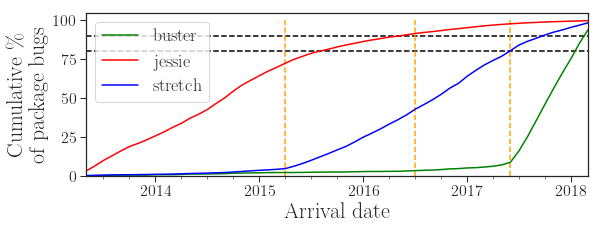

In [382]:
# When bugs were created
if True:
    df_tmp=docker_bugs.query('arrival>"2013-05-01"')
    df_tmp['arrival']=df_tmp['arrival'].apply(lambda x: x[0:7]+'-01' )
    #df_tmp['date']=df_tmp['date'].apply(lambda x: datetime.date(x, "%Y-%m"))
if True:
    df_tmp2=(df_tmp.#query('status=="resolved" or status=="open"').
            loc[:,['arrival','release','debianbug']])
    df_tmp2.drop_duplicates(inplace=True)
    df_tmp2=df_tmp2.groupby(['arrival','release']).count().reset_index()
    
dff=(df_tmp2.
    pivot(index='arrival', columns='release', values='debianbug').
    fillna(0).
    reset_index().
    sort_values('arrival', ascending=True))

dff['arrival']=dff['arrival'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
dff.set_index('arrival', inplace=True)

for x in dff:
    dff[x]=dff[x].cumsum()
    max=dff[x].values.max()
    dff[x]=dff[x]*100/max
    
ax=dff.plot( color=['green','red','blue'])#, ax=axes[int(i/2)][j], label=type)    
ax.hlines(80, pd.to_datetime('2013-05-01'), pd.to_datetime('2018-03-01'), colors='black', linestyles='dashed', alpha=1)
ax.hlines(90, pd.to_datetime('2013-05-01'), pd.to_datetime('2018-03-01'), colors='black', linestyles='dashed', alpha=1)

ax.set_ylim(0,)
ax.set_ylabel('Cumulative \% \n of package bugs')
ax.set_xlabel('Arrival date')
ax.figure.set_size_inches(9,3)
plt.tick_params(axis='both', which='major', labelsize=16, width=1)
L=plt.legend(loc='upper left', prop={'size': 18})
plt.setp(L.texts, family='Consolas')

ax.set_xlim(pd.to_datetime('2013-05-01'), pd.to_datetime('2018-03-17'))
ax.vlines(pd.to_datetime('2015-04-25'), 0,100, colors='orange', linestyles='dashed', alpha=1)
ax.vlines(pd.to_datetime('2017-06-18'), 0,100, colors='orange', linestyles='dashed', alpha=1)
ax.vlines(pd.to_datetime('2016-07-01'), 0,100, colors='orange', linestyles='dashed', alpha=1)

In [113]:
vuls=docker_bugs.query('status=="fixed"')
vuls=vuls.groupby(['severity']).count().reset_index()
vuls['source']=(vuls['source']*100/len(docker_bugs.query('status=="fixed"'))).apply(lambda x: "%.1f" % x)
vuls

,severity,type,debianbug,source,source_version,arrival,last_modified,status,release
0,critical,213,213,0.8,213,213,213,213,213
1,grave,862,862,3.1,862,862,862,862,862
2,important,6877,6877,24.7,6877,6877,6877,6877,6877
3,minor,2215,2215,7.9,2215,2215,2215,2215,2215
4,normal,11900,11900,42.7,11900,11900,11900,11900,11900
5,serious,1886,1886,6.8,1886,1886,1886,1886,1886
6,wishlist,3929,3929,14.1,3929,3929,3929,3929,3929


# Survival Analysis [ Bugs ]

In [173]:
# Here we include bugs that were fixed for the used version but in an other debian release
docker_bugs_fixed=pd.read_csv('../../docker/csv/docker_bugs_MAI.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)
docker_bugs_fixed.drop_duplicates(inplace=True)
bug_order=['wishlist','minor','normal','important','high']

docker_bugs_fixed=docker_bugs_fixed.query('status!="fixed" and status!="pending-fixed"')
docker_bugs_fixed['status']=docker_bugs_fixed['status'].apply(lambda x: "fixed" if x =="done" else x)

mask = docker_bugs_fixed['debianbug'].isin(docker_vulnerabilities['debianbug'].drop_duplicates())
docker_bugs_fixed=docker_bugs_fixed[~mask]

In [174]:
docker_bugs_fixed['severity']=docker_bugs_fixed['severity'].apply(lambda x:
                                                     'high' if x=="grave"
                                                     else 'high' if x=="serious"
                                                     else 'high' if x=="critical"
                                                     else x)

In [175]:
docker_bugs_fixed['observed']=docker_bugs_fixed['status'].apply(lambda d: True if d=="fixed" else False)
docker_bugs_fixed['last_modified']=docker_bugs_fixed.apply(lambda d: '2018-03-18' if d['status']=="pending" 
                                                           else d['last_modified'], axis=1)

docker_bugs_fixed['arrival']=docker_bugs_fixed['arrival'].apply( lambda x: datetime.strptime(x.split()[0], "%Y-%m-%d") )
docker_bugs_fixed['last_modified']=docker_bugs_fixed['last_modified'].apply( lambda x: datetime.strptime(x.split()[0], "%Y-%m-%d") )


docker_bugs_fixed.head(2)

,type,debianbug,source,source_version,arrival,last_modified,status,severity,release,observed
0,normal,677570,acl,2.2.52-2,2012-06-14,2018-03-18,pending,wishlist,jessie,False
1,archived,707963,acl,2.2.52-2,2013-05-12,2013-06-10,fixed,important,jessie,True


wishlist 37.1
minor 33.5666666667
high 3.13333333333
important 60.1333333333
normal 53.8333333333


/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/__init__.py:2401: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


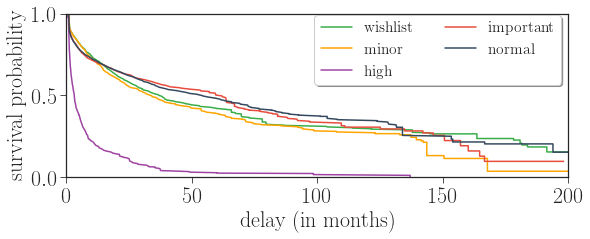

In [189]:
import lifelines
from lifelines.statistics import logrank_test
fig, ax = plt.subplots()


kmp_df = (
    docker_bugs_fixed.query('status=="fixed" or status=="pending"')
    [['debianbug', 'arrival', 'last_modified','severity','observed']]
    .assign()
    .assign(duration=lambda d: (d['last_modified'] - d['arrival']).dt.days / 30)
)

PALETTE = sns.color_palette(flatui)[:6] 
PALETTE_2 = sns.color_palette('Set3')[::-1]

kmp = lifelines.KaplanMeierFitter()
data = []
for i, severity in enumerate(['wishlist','minor','high','important','normal']):
    mask = kmp_df['severity'] == severity
    kmp.fit(kmp_df[mask]['duration'], kmp_df[mask]['observed'], label=severity)
    print(severity, kmp.median_)
    kmp.plot(ax=ax, ci_show=False, color=PALETTE[i])
    data.append((severity, kmp_df[mask]['duration'], kmp_df[mask]['observed']))
#ALL severity
#kmp.fit(kmp_df['duration'], kmp_df['observed'], label='')
#kmp.plot(ax=ax, ci_show=False,  color=PALETTE[6])


ax.set(
    xlim=(0, 200),
    xlabel='delay (in months)',
    ylim=(0, 1),
    ylabel='survival probability',
)
ax.figure.set_size_inches(9,3)
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.04), fontsize=15.5, fancybox=True, shadow=True,ncol=2)
#ax.vlines(8, 0,1, colors='orange', linestyles='dashed', alpha=1)
#ax.hlines(0.2, 0,200, colors='black', linestyles='dashed', alpha=1)
ax.figure.savefig('../../../seneca_research/docker_debian/figures/survival_bugs.pdf', bbox_inches='tight', facecolor='white')

In [409]:
from lifelines.statistics import logrank_test
import itertools

for a, b in itertools.combinations(data, 2):
    test = logrank_test(a[1], b[1], a[2], b[2])
    print('{} ~ {}: {:.3f} (p-value: {:.3f})'.format(
        a[0], b[0],  
        test.test_statistic, test.p_value, 
    ))

normal ~ important: 4.875 (p-value: 0.027)
normal ~ serious: 3742.246 (p-value: 0.000)
normal ~ grave: 1817.168 (p-value: 0.000)
normal ~ critical: 415.586 (p-value: 0.000)
normal ~ minor: 52.143 (p-value: 0.000)
normal ~ wishlist: 30.418 (p-value: 0.000)
important ~ serious: 3436.886 (p-value: 0.000)
important ~ grave: 1778.111 (p-value: 0.000)
important ~ critical: 422.420 (p-value: 0.000)
important ~ minor: 59.501 (p-value: 0.000)
important ~ wishlist: 42.556 (p-value: 0.000)
serious ~ grave: 2.928 (p-value: 0.087)
serious ~ critical: 1.009 (p-value: 0.315)
serious ~ minor: 2194.675 (p-value: 0.000)
serious ~ wishlist: 3052.566 (p-value: 0.000)
grave ~ critical: 3.193 (p-value: 0.074)
grave ~ minor: 1312.477 (p-value: 0.000)
grave ~ wishlist: 1660.231 (p-value: 0.000)
critical ~ minor: 365.313 (p-value: 0.000)
critical ~ wishlist: 422.989 (p-value: 0.000)
minor ~ wishlist: 7.306 (p-value: 0.007)


In [332]:
if True:
    df_tmp = (
        docker_bugs_fixed.query('status=="pending"')
        [['debianbug', 'arrival', 'last_modified','severity']].
        assign(duration=lambda d: (datetime.now() - d['arrival']).dt.days / 30)
    )
    for x in ['normal', 'important','serious','grave','critical','minor','wishlist']:
        print(x, df_tmp.query('severity=="'+x+'"').duration.max())

normal 218.6
important 199.833333333
serious 75.1333333333
grave 106.333333333
critical 41.5
minor 209.8
wishlist 256.633333333


# We trace the vulnerabilities with debianbug, then # Survival Analysis

In [190]:
packages_bugs=pd.read_csv('../../docker/csv/bugs_with_sources.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)
packages_bugs['source_version']=packages_bugs['found_in'].apply(lambda x:
                                                         str(x).split('/')[-1])

packages_bugs['fixed_in']=packages_bugs['fixed_in'].apply(lambda x:
                                                         str(x).split('/')[-1])

packages_bugs.drop_duplicates(inplace=True)
print('all bugs that may be affecting the used packages', len(packages_bugs))

all bugs that may be affecting the used packages 283027


In [191]:
test=docker_vulnerabilities[['cve','debianbug']].drop_duplicates()
len(test.query('debianbug=="undefined"'))/len(test)

0.6212217290213485

In [192]:
vuls=(docker_vulnerabilities
      [['urgency','debianbug','status']].
      merge(packages_bugs
            [['severity','debianbug','arrival','last_modified']].
            rename(columns={"severity":"severity_udd"}),
            left_on='debianbug',
            right_on='debianbug',
            how='left').dropna().reset_index()
     )

vuls=vuls.drop_duplicates()
vuls['urgency']=vuls['urgency'].apply(lambda x: x.split('*')[0])
vuls.rename(columns={'urgency':'severity'}, inplace=True)
print('we could track: ')
round(vuls['debianbug'].drop_duplicates().size/docker_vulnerabilities['debianbug'].drop_duplicates().size,2)
#print('of vulnerabilities that has a debianbug')

we could track: 


0.93

In [193]:
vuls['observed']=vuls['status'].apply(lambda d: True if d=="resolved" else False)
vuls['last_modified']=vuls.apply(lambda d: '2018-03-18' if d['status']=="open" 
                                                           else d['last_modified'], axis=1)

vuls['arrival']=vuls['arrival'].apply( lambda x: datetime.strptime(x.split()[0], "%Y-%m-%d") )
vuls['last_modified']=vuls['last_modified'].apply( lambda x: datetime.strptime(x.split()[0], "%Y-%m-%d") )

vuls.head(2)

,index,severity,debianbug,status,severity_udd,arrival,last_modified,observed
0,1,medium,876109,resolved,serious,2017-09-18,2017-10-24,True
1,2,medium,876109,resolved,serious,2017-09-18,2017-10-24,True


not assigned 5.9
low 27.1333333333
high 2.1
medium 2.43333333333


/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/__init__.py:2401: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


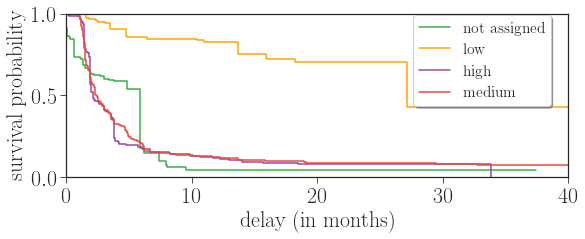

In [213]:
import lifelines
from lifelines.statistics import logrank_test
fig, ax = plt.subplots()

kmp_df = (
    vuls#.query('status=="resolved"')
    [['debianbug', 'arrival', 'last_modified','severity','observed']]
    .assign(duration=lambda d: (d['last_modified'] - d['arrival']).dt.days / 30)
)

PALETTE = sns.color_palette(flatui)[:6]
PALETTE_2 = sns.color_palette('Set3')[::-1]

kmp = lifelines.KaplanMeierFitter()
data = []

for i, severity in enumerate(['not assigned','low','high','medium',]):
    mask = kmp_df['severity'] == severity
    kmp.fit(kmp_df[mask]['duration'], kmp_df[mask]['observed'], label=severity)
    print(severity, kmp.median_)
    kmp.plot(ax=ax, ci_show=False, color=PALETTE[i])
    data.append((severity, kmp_df[mask]['duration'], kmp_df[mask]['observed']))
#ALL severity
#kmp.fit(kmp_df['duration'], kmp_df['observed'], label='')
#kmp.plot(ax=ax, ci_show=False,  color=PALETTE[6])

ax.set(
    xlim=(0, 40),
    xlabel='delay (in months)',
    ylim=(0, 1),
    ylabel='survival probability',
)
ax.figure.set_size_inches(9,3)
ax.legend(loc='upper right', bbox_to_anchor=(0.98, 1.04), fontsize=15.5, fancybox=True, shadow=True,ncol=1)
#ax.vlines(6, 0,1, colors='orange', linestyles='dashed', alpha=1)
#ax.hlines(0.1, 0,200, colors='black', linestyles='dashed', alpha=1)
ax.figure.savefig('../../../seneca_research/docker_debian/figures/survival_vuls.pdf', bbox_inches='tight', facecolor='white')

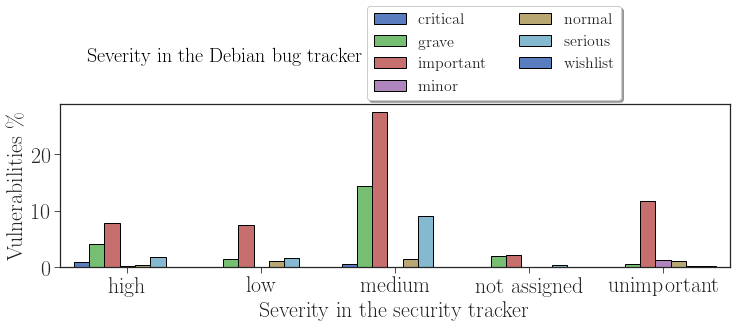

In [520]:
vuls_group=vuls.groupby(['severity','severity_udd']).count()[['debianbug']].reset_index()
vuls_group['debianbug']=vuls_group['debianbug']*100/len(vuls)

ax = sns.barplot(x="severity", 
                 y="debianbug", 
                 hue="severity_udd", 
                 #order=['wishlist','minor','normal','important','serious','grave','critical'],
                 data=vuls_group, 
                 palette="muted", 
                 linewidth=1)
ax.figure.set_size_inches(12,3)
ax.set_xlabel("Severity in the security tracker")
ax.set_ylabel('Vulnerabilities \%')
for patch in ax.patches:
    patch.set_edgecolor('black')
ax.text(0.04, 1.35, 'Severity in the Debian bug tracker', transform=ax.transAxes, fontsize=20,
        verticalalignment='top', color='black')
ax.legend(loc='upper right', bbox_to_anchor=(0.85, 1.65), ncol=2, fontsize=16, fancybox=True, shadow=True)

In [522]:
vuls_group=vuls.query('severity=="high"').groupby(['severity','severity_udd']).count()[['debianbug']].reset_index()
vuls_group['debianbug']=vuls_group['debianbug']*100/len(vuls.query('severity=="high"'))
vuls_group

,severity,severity_udd,debianbug
0,high,critical,6.010607
1,high,grave,27.224514
2,high,important,51.325869
3,high,minor,1.237478
4,high,normal,2.474956
5,high,serious,11.726576


In [523]:
27.224514+11.726576+6.010607

44.961697

normal inf
important 5.9
serious 3.76666666667
grave 3.1
critical 3.8
minor inf
wishlist inf


/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/__init__.py:2401: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


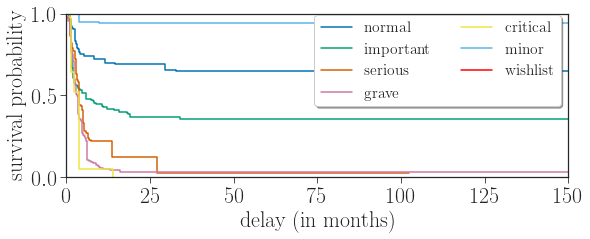

In [456]:
import lifelines
from lifelines.statistics import logrank_test
fig, ax = plt.subplots()

kmp_df = (
    vuls#.query('status=="resolved"')
    [['debianbug', 'arrival', 'last_modified','severity','observed']]
    .assign(duration=lambda d: (d['last_modified'] - d['arrival']).dt.days / 30)
)

PALETTE = sns.color_palette('Set3')[:6] + [(0.9, 0.5, 0.9)]
PALETTE_2 = sns.color_palette('Set3')[::-1]

kmp = lifelines.KaplanMeierFitter()
data = []
for severity in ['normal', 'important','serious','grave','critical','minor']:
#for severity in ['low','medium','not assigned']:
    mask = kmp_df['severity'] == severity
    kmp.fit(kmp_df[mask]['duration'], kmp_df[mask]['observed'], label=severity)
    print(severity, kmp.median_)
    kmp.plot(ax=ax, ci_show=False)
    data.append((severity, kmp_df[mask]['duration'], kmp_df[mask]['observed']))
#ALL severity
#kmp.fit(kmp_df['duration'], kmp_df['observed'], label='')
#kmp.plot(ax=ax, ci_show=False,  color=PALETTE[6])
mask = kmp_df['severity'] == 'wishlist'
kmp.fit(kmp_df[mask]['duration'], kmp_df[mask]['observed'], label='wishlist')
kmp.plot(ax=ax, ci_show=False,  color='red')
data.append(('wishlist', kmp_df[mask]['duration'], kmp_df[mask]['observed']))
print("wishlist", kmp.median_)

ax.set(
    xlim=(0, 150),
    xlabel='delay (in months)',
    ylim=(0, 1),
    ylabel='survival probability',
)
ax.figure.set_size_inches(9,3)
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.04), fontsize=15.5, fancybox=True, shadow=True,ncol=2)
#ax.vlines(6, 0,1, colors='orange', linestyles='dashed', alpha=1)
#ax.hlines(0.1, 0,200, colors='black', linestyles='dashed', alpha=1)
#ax.figure.savefig('../../seneca_research/docker_debian/figures/survival_vuls.pdf', bbox_inches='tight', facecolor='white')

In [214]:
from lifelines.statistics import logrank_test
import itertools

for a, b in itertools.combinations(data, 2):
    test = logrank_test(a[1], b[1], a[2], b[2])
    print('{} ~ {}: {:.3f} (p-value: {:.3f})'.format(
        a[0], b[0], 
        test.test_statistic, test.p_value, 
    ))

not assigned ~ low: 2090.402 (p-value: 0.000)
not assigned ~ high: 18.217 (p-value: 0.000)
not assigned ~ medium: 6.660 (p-value: 0.010)
low ~ high: 3011.243 (p-value: 0.000)
low ~ medium: 3376.507 (p-value: 0.000)
high ~ medium: 3.466 (p-value: 0.063)


In [255]:
if True:
    df_tmp = (
        vuls.query('status=="open"')
        [['debianbug', 'arrival', 'last_modified','severity']].
        assign(duration=lambda d: (datetime.now() - d['arrival']).dt.days / 30)
    )
    for x in ['unimportant','low','medium','high']:
        print(x, df_tmp.query('severity=="'+x+'"').duration.median())

unimportant 9.5
low 9.466666666666667
medium 9.5
high 8.333333333333334


# Here we study the popularity of containers

In [63]:
community_images=pd.read_csv('../docker/csv/docker_images_com.csv', sep=',', dtype=object, index_col=None,  error_bad_lines=False)
community_images.drop_duplicates(inplace=True)
community_images['name']=community_images['name'].apply(lambda x: x.replace('/',':'))

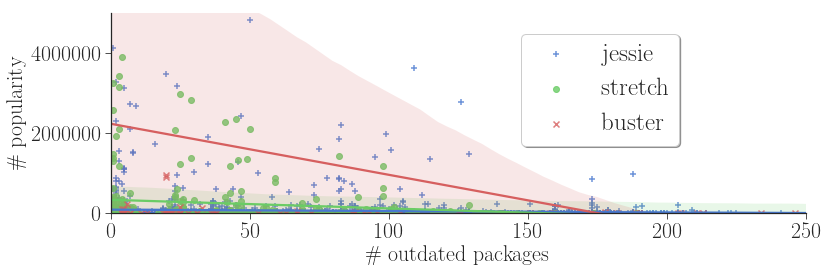

In [64]:
outdate_popularity=(outdate_community.
                    merge(community_images,
                    left_on='name',
                    right_on='name',
                    how='left').dropna().reset_index()
                   )
outdate_popularity['popularity']=outdate_popularity['popularity'].apply(int)

df_tmp=(outdate_popularity[['name','popularity','isOutdate','debian']].
        query('isOutdate=="Out-of-date"').
        groupby(['debian','name','popularity']).
        count().
        reset_index()
       )

order=['jessie','stretch','buster']
ax = sns.lmplot(x="isOutdate", y="popularity", markers=["+", 'o','x'], 
                hue="debian", palette='muted', data=df_tmp, 
                size=8, legend='', hue_order=order)
ax.fig.set_size_inches(12,3.5)
ax.set_ylabels('\# popularity')
ax.set_xlabels('\# outdated packages')
ax.fig.legend(loc='upper right', bbox_to_anchor=(0.8, 1), fontsize=25, fancybox=True, shadow=True)# ,ncol=3)
ax.set(ylim=(0,5000000), xlim=(0,250))

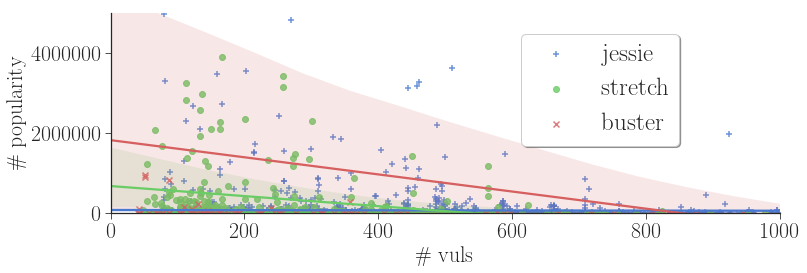

In [119]:
vuls_popularity=(lag_vul_all.query('type=="Community"')[['name','debian','cve']].
                    merge(community_images,
                    left_on='name',
                    right_on='name',
                    how='left').dropna().reset_index()
                   )
vuls_popularity['popularity']=vuls_popularity['popularity'].apply(int)

df_tmp=(vuls_popularity[['name','popularity','debian','cve']].
        groupby(['debian','name','popularity']).
        count().
        reset_index()
       )

order=['jessie','stretch','buster']
ax = sns.lmplot(x="cve", y="popularity", markers=["+", 'o','x'], 
                hue="debian", palette='muted', data=df_tmp, 
                size=8, legend='', hue_order=order)
ax.fig.set_size_inches(12,3.5)
ax.set_ylabels('\# popularity')
ax.set_xlabels('\# vuls')
ax.fig.legend(loc='upper right', bbox_to_anchor=(0.8, 1), fontsize=25, fancybox=True, shadow=True)# ,ncol=3)
ax.set(ylim=(0,5000000), xlim=(0,1000))

In [121]:
for x in ['jessie','stretch','buster']:
    test=df_tmp.query('debian=="'+x+'"')
    print(x,scipy.stats.pearsonr(test.popularity, test.cve),'\n')
    
for x in ['jessie','stretch','buster']:
    test=df_tmp.query('debian=="'+x+'"')
    print(x,scipy.stats.spearmanr(test.popularity, test.cve),'\n')

jessie (-0.016515831762519789, 0.3223163542503551) 

stretch (-0.039936336692800556, 0.15854515887763868) 

buster (-0.046666226232369157, 0.66962356863956041) 

jessie SpearmanrResult(correlation=-0.028740987815487933, pvalue=0.084972057622560215) 

stretch SpearmanrResult(correlation=-0.030064317639563111, pvalue=0.28857218229128268) 

buster SpearmanrResult(correlation=-0.19105915479665328, pvalue=0.078043202193897362) 



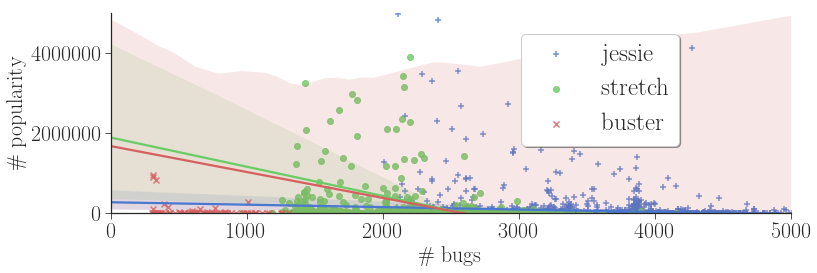

In [65]:
vuls_popularity=(lag_bug_all.query('type=="Community"')[['name','debian','debianbug']].
                    merge(community_images,
                    left_on='name',
                    right_on='name',
                    how='left').dropna().reset_index()
                   )
vuls_popularity['popularity']=vuls_popularity['popularity'].apply(int)

df_tmp=(vuls_popularity[['name','popularity','debian','debianbug']].
        groupby(['debian','name','popularity']).
        count().
        reset_index()
       )

order=['jessie','stretch','buster']
ax = sns.lmplot(x="debianbug", y="popularity", markers=["+", 'o','x'], 
                hue="debian", palette='muted', data=df_tmp, 
                size=8, legend='', hue_order=order)
ax.fig.set_size_inches(12,3.5)
ax.set_ylabels('\# popularity')
ax.set_xlabels('\# bugs')
ax.fig.legend(loc='upper right', bbox_to_anchor=(0.8, 1), fontsize=25, fancybox=True, shadow=True)# ,ncol=3)
ax.set(ylim=(0,5000000), xlim=(0,5000))

In [67]:
print('Up to date and only Resolved')
for x in ['jessie','stretch','buster']:
    test=df_tmp
    print(x,scipy.stats.pearsonr(test.popularity, test.debianbug),'\n')
    
for x in ['jessie','stretch','buster']:
    test=df_tmp
    print(x,scipy.stats.spearmanr(test.popularity, test.debianbug),'\n')

Up to date and only Resolved
jessie (-0.06195907491322214, 1.3481129757351075e-05) 

stretch (-0.06195907491322214, 1.3481129757351075e-05) 

buster (-0.06195907491322214, 1.3481129757351075e-05) 

jessie SpearmanrResult(correlation=-0.030951853018282013, pvalue=0.029813447007936839) 

stretch SpearmanrResult(correlation=-0.030951853018282013, pvalue=0.029813447007936839) 

buster SpearmanrResult(correlation=-0.030951853018282013, pvalue=0.029813447007936839) 



We could not find any relation between popularity and other things

# What about the package populairy ( not included in the paper)

In [68]:
f=open('../docker/csv/debian_package_by_inst.csv', 'w')
with open('../docker/csv/debian_package_by_inst.txt') as lines:
    for line in lines.readlines():
        line=line.split()
        line=';'.join(line)
        f.write(line+'\n')
f.close()

In [4]:
for index, file in enumerate(os.listdir('../docker/debian_packages_18March/')):
    if index ==0:
        debian_packages=pd.read_csv('../docker/debian_packages_18March/'+file, sep=';', dtype=object, index_col=None,  error_bad_lines=False)
    else:
        df=pd.read_csv('../docker/debian_packages_18March/'+file, sep=';', dtype=object, index_col=None,  error_bad_lines=False)
        debian_packages=pd.concat([debian_packages,df])

for x in debian_packages:
    debian_packages[x]=debian_packages[x].apply(lambda d: d.replace(' ',''))
        
debian_packages=debian_packages.drop("priority", axis=1)
#debian_packages=debian_packages.loc[:,['package','version','source']]
debian_packages.drop_duplicates(inplace=True)
######## Now here we consider only the first date when the package version was seen
debian_packages=(debian_packages.
                 sort_values('date', ascending=True).
                 groupby(['package','version']).
                 first().
                 reset_index())

debian_packages['source_version']=debian_packages['version']+'|'+debian_packages['source']
debian_packages['source_version']=debian_packages['source_version'].apply(lambda x:
                                                                          x.split('|')[1].split(')')[0].split('(')[1] if '(' in x.split('|')[1]
                                                                          else x.split('|')[0])
debian_packages['source']=debian_packages['source'].apply(lambda x: x.split('(')[0])
debian_packages=debian_packages.query('date<"20180328"')
len(debian_packages)



608578

In [6]:
len(debian_packages[['package','version']].drop_duplicates())

608578

In [72]:
# from functools import reduce

pop_packages=pd.read_csv('../docker/csv/debian_package_by_inst.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)
pop_packages.drop_duplicates(inplace=True)
pop_packages.drop(['rank','no-files'], axis=1, inplace=True)

# number of containers using the packages
pop_docker=pd.concat([official_sources,community_sources])
pop_docker=pop_docker[['name','source']].drop_duplicates().groupby('source').count().reset_index()

# numbers of containers having the package outdated
pop_lag=pd.concat([outdate_official,outdate_community])
pop_lag=pop_lag.query('isOutdate=="Out-of-date"')[['name','source']].drop_duplicates().groupby('source').count().reset_index()
pop_lag.rename(columns={'name':'outdate'}, inplace=True)


# numbers of containers having the package updated
pop_lag2=pd.concat([outdate_official,outdate_community])
pop_lag2=pop_lag2.query('isOutdate=="Up-to-date"')[['name','source']].drop_duplicates().groupby('source').count().reset_index()
pop_lag2.rename(columns={'name':'update'}, inplace=True)

# numbers of releases per package
pop_releases=debian_packages[['source','source_version']].drop_duplicates().groupby('source').count().reset_index()
pop_releases.rename(columns={'source_version':'releases'}, inplace=True)

# numbers of vulnerabilities per package
#pop_vul=lag_vul_all[['cve','source']].drop_duplicates().groupby('source').count().reset_index()

# numbers of bugs per vulnerabilities
pop_bug=lag_bug_all[['debianbug','source']].drop_duplicates().groupby('source').count().reset_index()

# all dafaframes
dfs=[pop_bug, pop_packages, pop_lag,pop_lag2,pop_releases]#,pop_vul]

#final_pop = reduce(lambda left,right: pd.merge(left,right,on='source'), dfs)
pop_final=pop_docker
for index, df in enumerate(dfs):
    pop_final=(pop_final.
              merge(df,
                    left_on='source',
                    right_on='source',
                    how='left')
             )
    
pop_final.fillna(0, inplace=True)
for x in pop_final:
    if x!='source':
        pop_final[x]=pop_final[x].apply(int)


b'Skipping line 344: expected 7 fields, saw 9\n'


In [73]:
pop_final=pop_final.sort_values('inst', ascending=True).iloc[231:]

name debianbug (0.10535544076361579, 1.0308779939417566e-10) 

name debianbug SpearmanrResult(correlation=0.2495765778248818, pvalue=2.8708199423505649e-54) 

name inst (0.60235710635408646, 0.0) 

name inst SpearmanrResult(correlation=0.68855423188786513, pvalue=0.0) 

name vote (0.71560568683345438, 0.0) 

name vote SpearmanrResult(correlation=0.50399876190547799, pvalue=1.9537429441145874e-240) 

name old (0.32963947935868093, 1.3352889270707718e-95) 

name old SpearmanrResult(correlation=0.53711453791157127, pvalue=6.5066652396224622e-279) 

name recent (0.50259661993612015, 6.7294485829841522e-239) 

name recent SpearmanrResult(correlation=0.53855461096101431, pvalue=1.0995457551832058e-280) 

name cve (0.12802913825508169, 3.731250188681856e-15) 

name cve SpearmanrResult(correlation=0.25066761117823494, pvalue=9.617154650684761e-55) 

name outdate (0.57170573903214883, 4.9406564584124654e-324) 

name outdate SpearmanrResult(correlation=0.40854309518462495, pvalue=1.3200976163511

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


inst cve (0.10207238672829265, 3.8522719851198729e-10) 

inst cve SpearmanrResult(correlation=0.23248095793829837, pvalue=3.967979138950929e-47) 

inst outdate (0.32251378399906788, 2.2928326380950558e-91) 

inst outdate SpearmanrResult(correlation=0.33418336726502312, pvalue=2.3186223058933478e-98) 

inst update (0.59219708045757602, 0.0) 

inst update SpearmanrResult(correlation=0.68539419725715867, pvalue=0.0) 

inst releases (0.24941277671275675, 3.3815225694368326e-54) 

inst releases SpearmanrResult(correlation=0.25297401769268157, pvalue=9.3608536537422663e-56) 

vote old (0.42273257510793405, 3.3027256662450645e-162) 

vote old SpearmanrResult(correlation=0.90113814496606759, pvalue=0.0) 

vote recent (0.68829382795682237, 0.0) 

vote recent SpearmanrResult(correlation=0.90597197276925601, pvalue=0.0) 

vote cve (0.10385045186204554, 1.8960543635217432e-10) 

vote cve SpearmanrResult(correlation=0.25320773094143539, pvalue=7.3826329130668468e-56) 

vote outdate (0.4399911469165

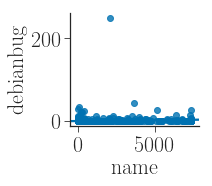

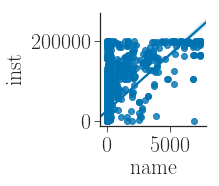

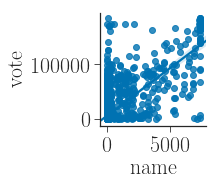

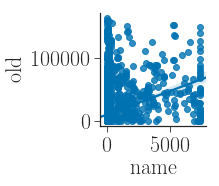

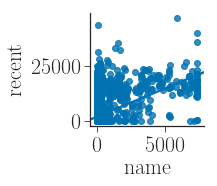

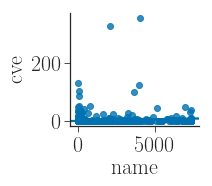

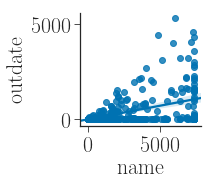

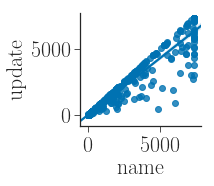

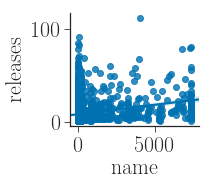

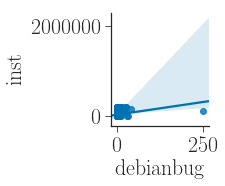

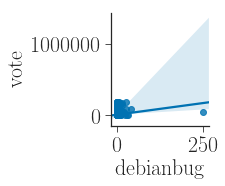

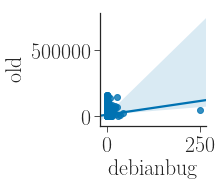

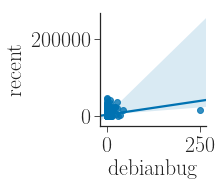

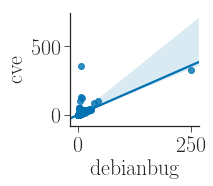

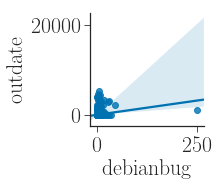

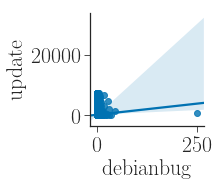

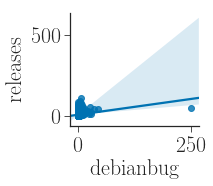

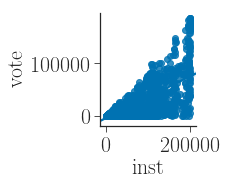

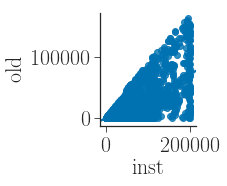

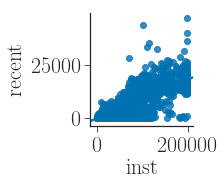

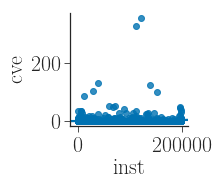

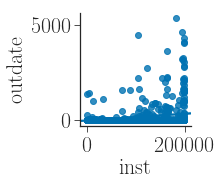

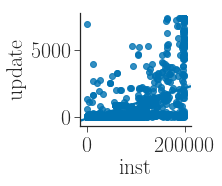

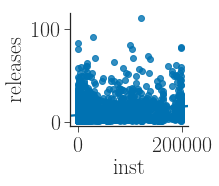

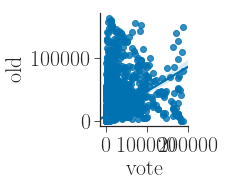

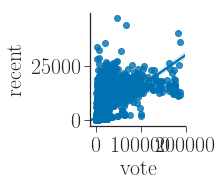

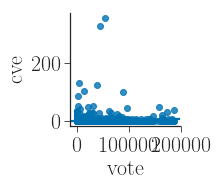

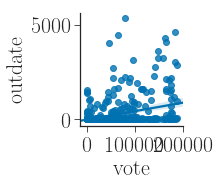

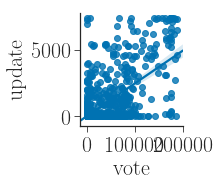

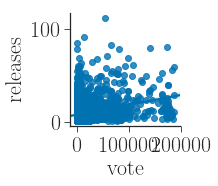

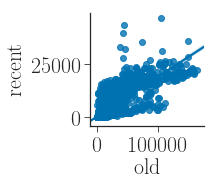

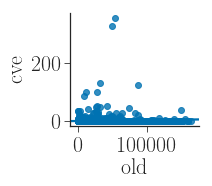

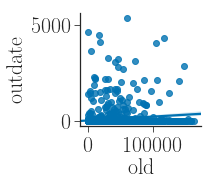

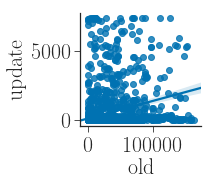

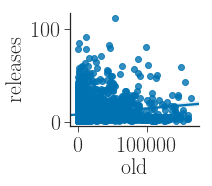

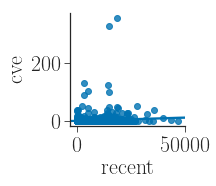

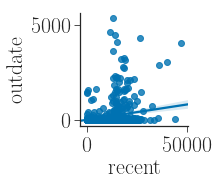

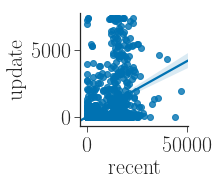

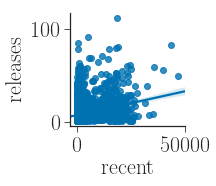

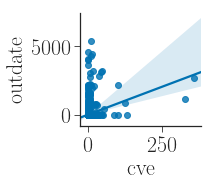

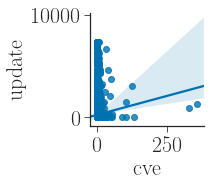

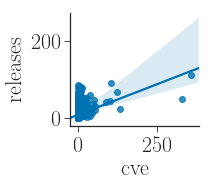

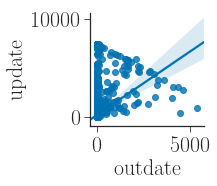

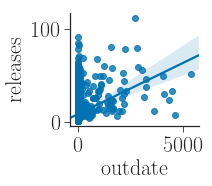

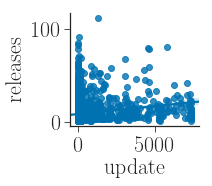

In [150]:
bar=[]
for x in pop_final.set_index('source'):
    for y in pop_final.set_index('source'):
        if x!=y and set([x,y]) not in bar:
            ax = sns.lmplot(x=x, y=y, palette='muted', data=pop_final, size=4, legend='')
            ax.fig.set_size_inches(3,2.5)
            print(x,y,scipy.stats.pearsonr(pop_final[x], pop_final[y]),'\n')
            print(x,y,scipy.stats.spearmanr(pop_final[x], pop_final[y]),'\n')
            bar.append(set([x,y]))
#ax.set(xlim=(0,7380))

In [202]:
x=pop_final['outdate']+pop_final['update']

7960

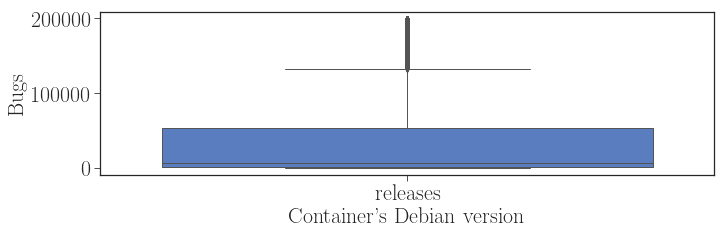

In [151]:
# How many bugs vs how many release
pop_final['p']="releases"
ax = sns.boxplot( x="p", y="inst", data=pop_final,palette="muted", linewidth=1)
ax.figure.set_size_inches(11,3)
ax.set_xlabel("Container's Debian version")
ax.set_ylabel('Bugs')
for patch in ax.patches:
    patch.set_edgecolor('black')

In [16]:
semver('1.X.X',['1.0.0'])

['1.0.0']